#### Instituto Federal de Educação Tecnológica de Minas Gerais - Campus Ouro Preto
#### Especialização em Inteligência Artificial – IFMG
#### Trabalho da disciplina de Aprendizado de Máquina
###### Professor: Frederico Gadelha Guimarães
###### Aluno: Dionízio Júnio Inácio
 


##### Conforme solicitado pelo enunciado do trabalho, o código abaixo inclui a aplicação das técnicas de Apredizado de Máquina, KNN, Naive Bayes e Árvore de decisão
##### seguindo um pipeline completo e contendo considerações finais sobre a aplicação de cada uma das técnicas, bem como as devidas comparações entre os resultados.

In [1]:
# Importar as bibliotecas necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve, auc, confusion_matrix, accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

# Carregar os dados

In [2]:
#Obtendo a base de dados
df = pd.read_csv('Diabetes Binary Classification.csv')
df

,Number of times pregnant,Plasma glucose concentration a 2 hours in an oral glucose tolerance test,Diastolic blood pressure (mm Hg),Triceps skin fold thickness (mm),2-Hour serum insulin (mu U/ml),Body mass index (weight in kg/(height in m)^2),Diabetes pedigree function,Age (years),Class variable (0 or 1)
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [3]:
#Verificando os 10 primeiros elementos da base 
df.head(50)

,Number of times pregnant,Plasma glucose concentration a 2 hours in an oral glucose tolerance test,Diastolic blood pressure (mm Hg),Triceps skin fold thickness (mm),2-Hour serum insulin (mu U/ml),Body mass index (weight in kg/(height in m)^2),Diabetes pedigree function,Age (years),Class variable (0 or 1)
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [4]:
#Checando os tipos de dados da base 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                                                                    Non-Null Count  Dtype  
---  ------                                                                    --------------  -----  
 0   Number of times pregnant                                                  768 non-null    int64  
 1   Plasma glucose concentration a 2 hours in an oral glucose tolerance test  768 non-null    int64  
 2   Diastolic blood pressure (mm Hg)                                          768 non-null    int64  
 3   Triceps skin fold thickness (mm)                                          768 non-null    int64  
 4   2-Hour serum insulin (mu U/ml)                                            768 non-null    int64  
 5   Body mass index (weight in kg/(height in m)^2)                            768 non-null    float64
 6   Diabetes pedigree function                                         

In [5]:
#Transpondo a base para observação dos dados
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Number of times pregnant,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Plasma glucose concentration a 2 hours in an oral glucose tolerance test,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
Diastolic blood pressure (mm Hg),768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
Triceps skin fold thickness (mm),768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
2-Hour serum insulin (mu U/ml),768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
Body mass index (weight in kg/(height in m)^2),768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
Diabetes pedigree function,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age (years),768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Class variable (0 or 1),768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


#### Análise exploratória dos dados

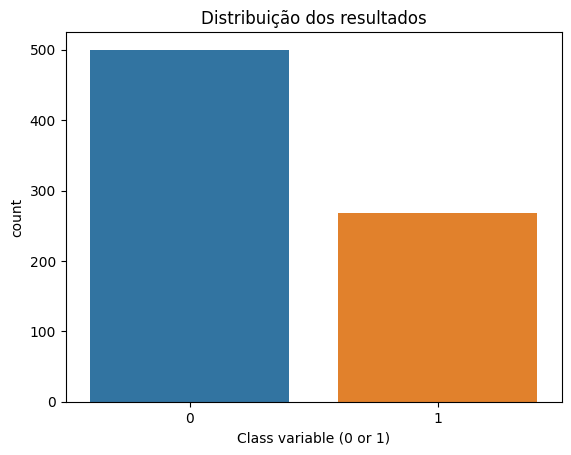

In [6]:
import seaborn as sbs
#Distribuição da variável de classificação
sbs.countplot(x='Class variable (0 or 1)', data=df)
plt.title('Distribuição dos resultados')
plt.show()

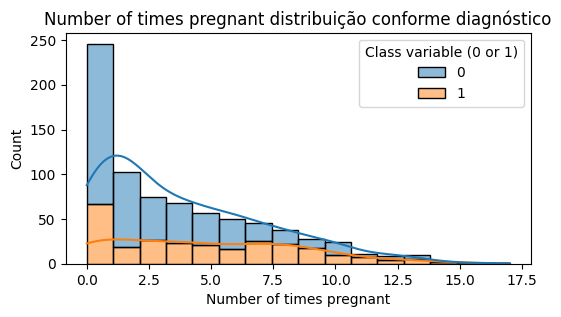

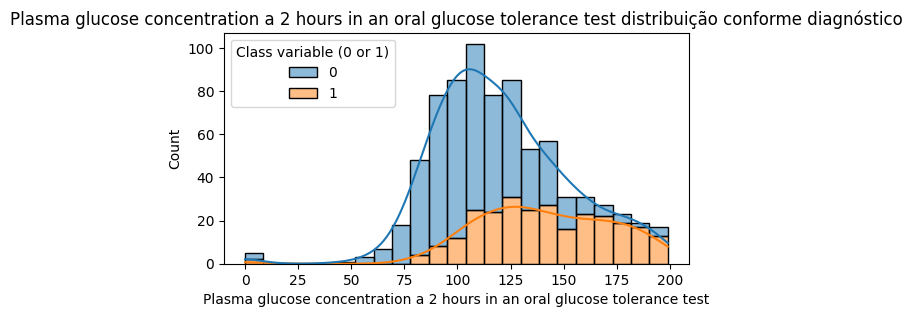

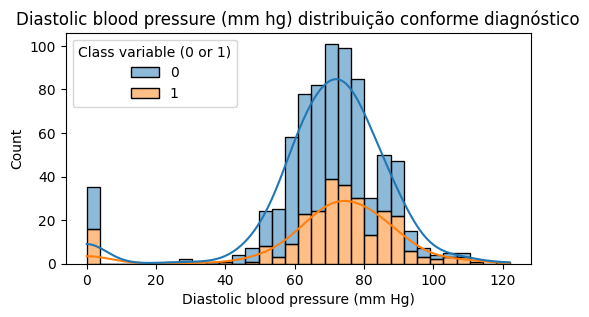

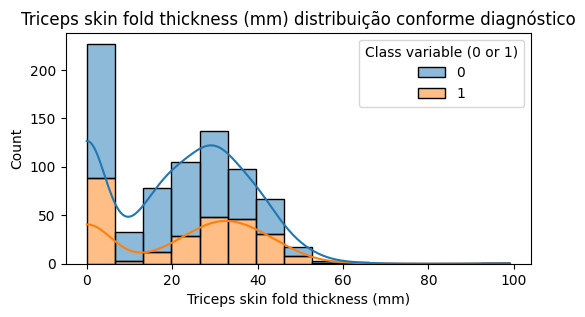

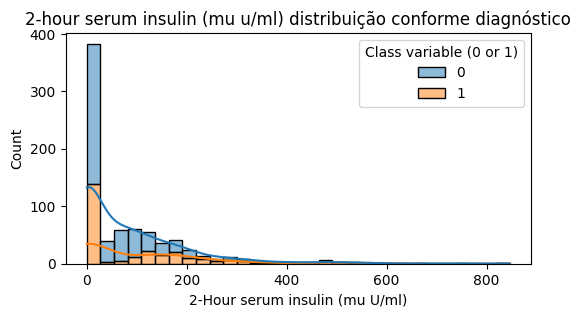

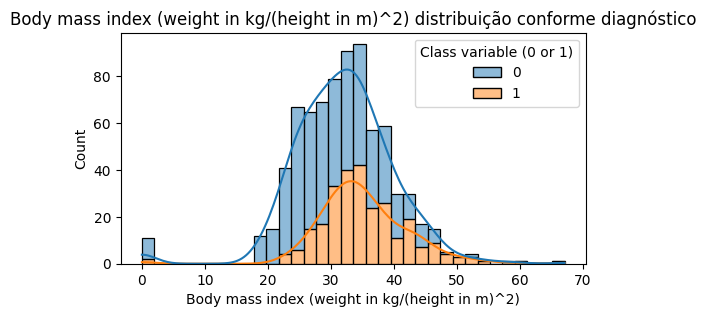

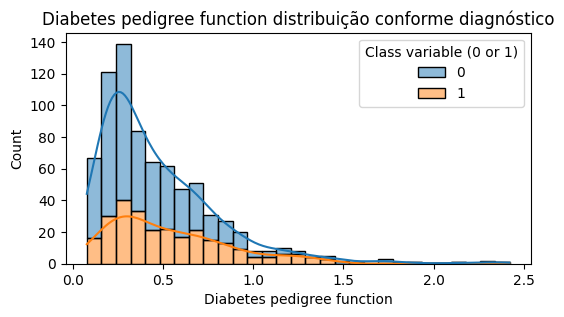

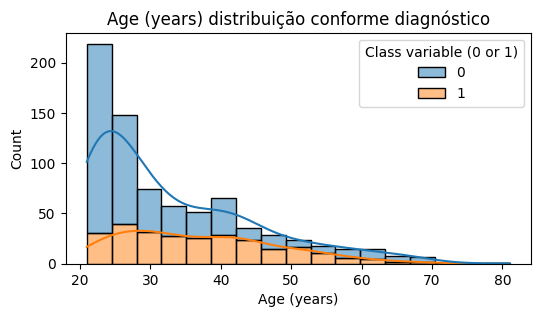

In [7]:
# Distribuição dos diagnósticos conforme cada um dos atributos
atributos_sel = df.drop(['Class variable (0 or 1)'], axis=1)
for atributos in atributos_sel:
    plt.figure(figsize=(6, 3))
    sbs.histplot(data=df, x=atributos, hue='Class variable (0 or 1)', kde=True, multiple='stack')
    plt.title(f'{atributos.capitalize()} distribuição conforme diagnóstico')
    plt.show()

In [8]:

#Separando os dados em classes e váriável de classificação 
X = df.drop('Class variable (0 or 1)', axis=1)
Y = df['Class variable (0 or 1)']

In [9]:
#Fazendo a padronização das features (média 0 e Desvio Padrão 1)
escalonar = StandardScaler()
X_escalonado= escalonar.fit_transform(X)

#Dividindo o conjunto em base de treinamento e base de teste (proporção padrão de 80% e 20%) 
X_train, X_test, y_train, y_test = train_test_split(X_escalonado, Y, test_size=0.2, random_state=42)

# Definir o espaço de busca para o hiperparâmetro k
param_grid = {'n_neighbors': range(1, 20)}

# Aplicar Grid Search com validação cruzada
grid_search = GridSearchCV(knn_model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_escalonado, Y)

# Obter o melhor valor de k
best_k = grid_search.best_params_['n_neighbors']
print(f"Melhor valor de k encontrado: {best_k}")

NameError: name 'knn_model' is not defined

In [ ]:
#Modelo KNN com o melhor k encontrado
knn_model = KNeighborsClassifier(n_neighbors=best_k)
knn_model.fit(X_train, y_train)

# Aplicar Grid Search com validação cruzada
grid_search = GridSearchCV(knn_model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_escalonado, Y)

#Fazendo a previsão dos resultados no conjunto de teste
y_pred = knn_model.predict(X_test)

In [ ]:
# Calcular a acurácia do modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Acurácia do modelo KNN: {accuracy:.2f}')

Acurácia do modelo KNN: 0.75


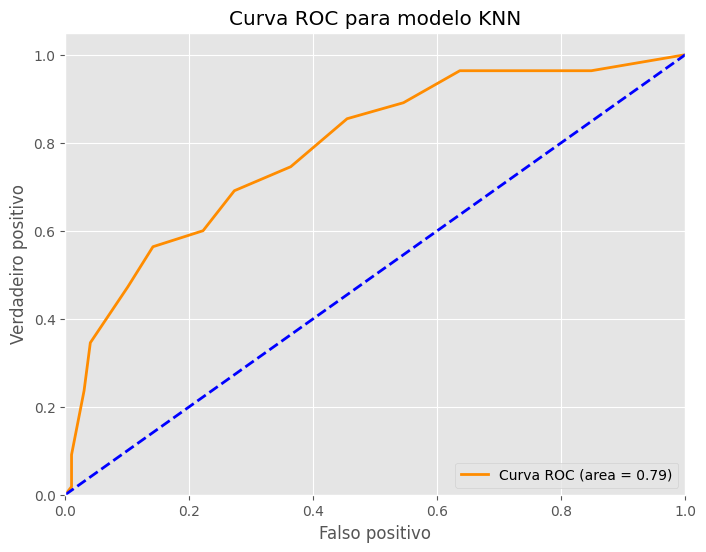

In [ ]:
#Calculando a probabilidade de cada classe para aplicação da curva ROC
y_prob = knn_model.predict_proba(X_test)[:, 1]

#Calculando a curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plotar a curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Curva ROC (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Falso positivo')
plt.ylabel('Verdadeiro positivo')
plt.title('Curva ROC para modelo KNN')
plt.legend(loc='lower right')
plt.show()

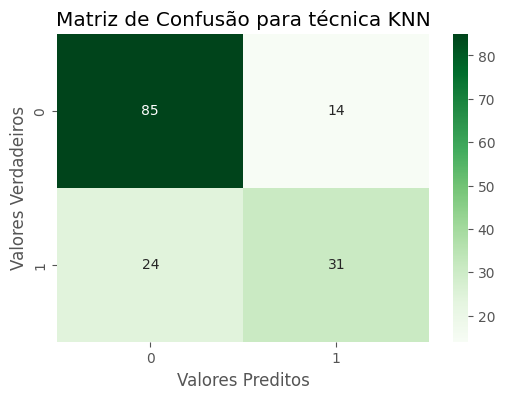

In [ ]:
#Montando a matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Greens')
plt.title('Matriz de Confusão para técnica KNN')
plt.xlabel('Valores Preditos')
plt.ylabel('Valores Verdadeiros')
plt.show()

 ### Aplicando Naive Bayes na mesma base

In [ ]:
#A separação de features e divisão da base para treinamento e teste será mantida 

#Criando e treinando o modelo Naive Bayes
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

#Prever os resultados no conjunto de teste
y_pred = nb_model.predict(X_test)

#Calculando a acurácia do modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Acurácia do modelo Naive Bayes: {accuracy:.2f}')

Acurácia do modelo Naive Bayes: 0.77


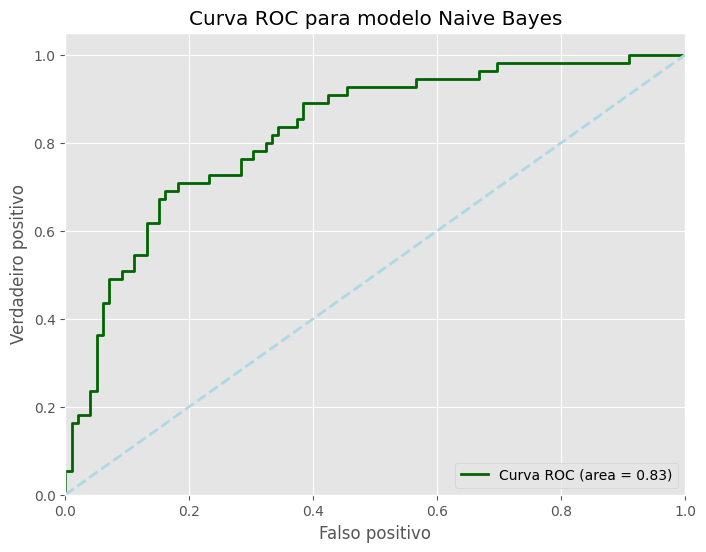

In [ ]:
#Calculando a probabilidade das classes para a curva ROC
y_prob = nb_model.predict_proba(X_test)[:, 1]

#Calculando a curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

#Plotando a curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkgreen', lw=2, label=f'Curva ROC (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='lightblue', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Falso positivo')
plt.ylabel('Verdadeiro positivo')
plt.title('Curva ROC para modelo Naive Bayes')
plt.legend(loc='lower right')
plt.show()

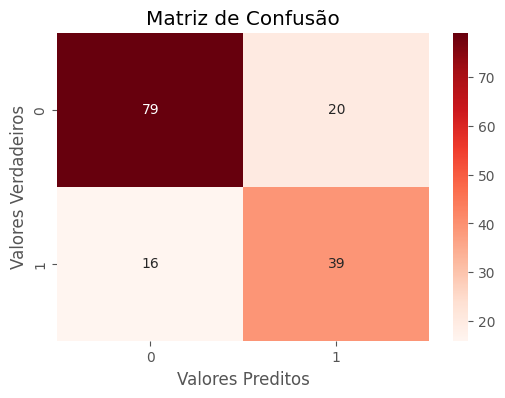

In [ ]:

# Calculando e plotando a matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Reds')
plt.title('Matriz de Confusão')
plt.xlabel('Valores Preditos')
plt.ylabel('Valores Verdadeiros')
plt.show()

 ### Aplicando Árvore de decisão na mesma base

In [ ]:
#Mais uma vez, a separação de features e divisão da base para treinamento e teste será mantida 

#Criando e treinando o modelo de Árvore de Decisão
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

#Fazendo a predição dos resultados no conjunto de teste
y_pred = dt_model.predict(X_test)

#Calculando a acurácia do modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Acurácia do modelo de Árvore de Decisão: {accuracy:.2f}')

Acurácia do modelo de Árvore de Decisão: 0.75


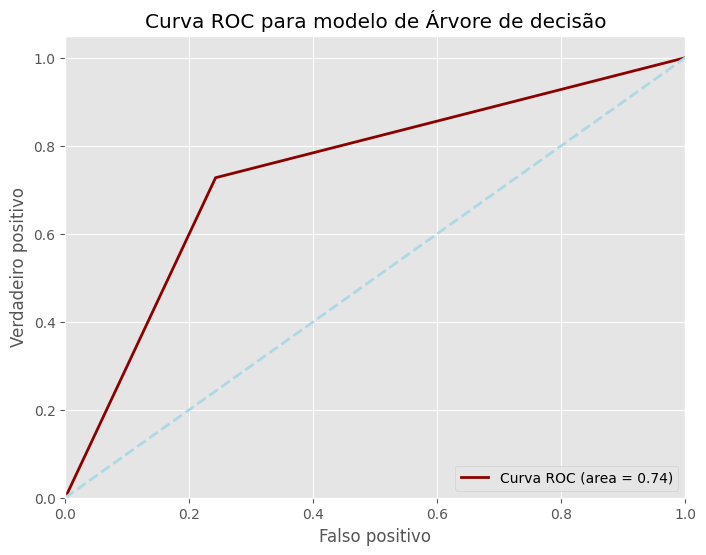

In [ ]:
# Calcular a probabilidade das classes para a curva ROC
y_prob = dt_model.predict_proba(X_test)[:, 1]

# Calcular a curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plotar a curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkred', lw=2, label=f'Curva ROC (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='lightblue', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Falso positivo')
plt.ylabel('Verdadeiro positivo')
plt.title('Curva ROC para modelo de Árvore de decisão')
plt.legend(loc='lower right')
plt.show()

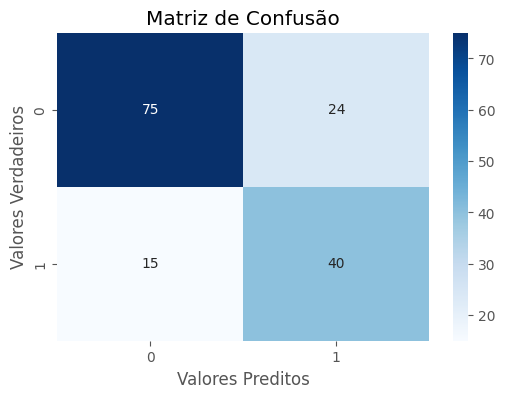

In [ ]:
# Calcular e exibir a matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusão')
plt.xlabel('Valores Preditos')
plt.ylabel('Valores Verdadeiros')
plt.show()

##### Considerações acerca dos modelos
##### Os valores obtidos para cada modelo foram: 

##### KNN: 
###### Área da curva ROC = 0,79
###### Matriz de confusão = 85, 14, 24 31
###### Acurácia = 0,75

##### Naive Bayes:
###### Área da curva ROC = 0,83
###### Matriz de confusão = 79, 20, 16, 39
###### Acurácia = 0,77

##### Árvore de decisão:
###### Área de curva ROC = 0,74
###### Matriz de confusão = 75, 24, 15, 40
###### Acurácia = 0,75



###### Levando em consideração as métricas obtidas em cada modelo, em ralação a curva ROC o modelo Naive Bayes se mostrou com maior capacidade de generalização entre as classes 
###### negativas e positivas, o modelo KNN teve a segunda maior área da curva ROC, mostrando também uma boa capacidade de distinguir as classes e o modelo que utiliza árvore de 
###### decisão mostrou-se menos eficiente neste quesito.

###### Considerando os valores obtidos para matriz de confusão e a acurácia, o modelo de Naive Bayes mostrou-se mais eficiente, pois classificou corretamente 77% dos casos contra
###### 75% para os modelos KNN e Árvore de decisão. Em linhas gerais, o modelo de Naive Bayes também é mais eficiente para discriminar e classificar corretamente.